# Movie Rating Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

# Try different encodings if you encounter an error
try:
    df = pd.read_csv('dataset/IMDb Movies India.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('dataset/IMDb Movies India.csv', encoding='latin1')


## Data Preprocessing

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.duplicated().sum()

6

In [9]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify that there are no more missing values
print(df_cleaned.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [10]:
df = df.drop_duplicates().reset_index(drop=True)


In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
df.duplicated().sum()

0

In [13]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [14]:
print(df['Genre'].nunique())


485


In [15]:
print(df['Genre'].value_counts())


Genre
Drama                         2779
Action                        1288
Thriller                       777
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64


In [16]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Feature Engineering 

In [17]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


# Ensure the 'Genre' column is properly split into lists of genres
df['Genre'] = df['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] if isinstance(x, str) else [])

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply Multi-Label One-Hot Encoding to the 'Genre' column
genre_encoded = mlb.fit_transform(df['Genre'])

# Convert the encoded genres into a DataFrame with appropriate column names
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Concatenate the new genre columns with the original DataFrame
df = pd.concat([df, genre_df], axis=1)

# Drop the original 'Genre' column since it's now encoded
df.drop('Genre', axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())




                                 Name    Year Duration  Rating Votes  \
0                                         NaN      NaN     NaN   NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0     8   
2                         #Homecoming  (2021)   90 min     NaN   NaN   
3                             #Yaaram  (2019)  110 min     4.4    35   
4                   ...And Once Again  (2010)  105 min     NaN   NaN   

             Director       Actor 1             Actor 2          Actor 3  \
0       J.S. Randhawa      Manmauji              Birbal  Rajendra Bhatia   
1       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande    Arvind Jangid   
2  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur       Roy Angana   
3          Ovais Khan       Prateik          Ishita Raj  Siddhant Kapoor   
4        Amol Palekar  Rajat Kapoor  Rituparna Sengupta      Antara Mali   

   Action  ...  Mystery  News  Reality-TV  Romance  Sci-Fi  Short  Sport  \
0       0  ...        0     0     

In [18]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


# Ensure 'Year' column is treated as string
df['Year'] = df['Year'].astype(str)

# 1. Clean and Convert 'Year' Column
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)

# Ensure 'Duration' column is treated as string
df['Duration'] = df['Duration'].astype(str)

# 2. Clean and Convert 'Duration' Column
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Convert 'Votes' to numeric, ensuring to handle non-numeric values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Handle Missing Values in 'Rating'
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Convert Categorical Columns to Numeric using LabelEncoder
label_encoders = {}
categorical_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Normalize/Scale Numerical Features
scaler = StandardScaler()
numerical_columns = ['Year', 'Duration', 'Rating', 'Votes']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the updated DataFrame
print(df.head())

# Check the columns to verify the correct transformation
print(df.columns)


                                 Name      Year  Duration    Rating     Votes  \
0                                           NaN       NaN  0.081662       NaN   
1  #Gadhvi (He thought he was Gandhi)  1.258755 -0.661580  1.091080 -0.581058   
2                         #Homecoming  1.337443 -1.318736  0.081662       NaN   
3                             #Yaaram  1.258755 -0.626993 -1.533406 -0.442024   
4                   ...And Once Again  0.904656 -0.799929  0.081662       NaN   

   Director  Actor 1  Actor 2  Actor 3  Action  ...  Mystery  News  \
0      1926     2250      800     3108       0  ...        0     0   
1      1548     3280     4790      527       0  ...        0     0   
2      5123     3713     2866     3450       0  ...        0     0   
3      3319     2917     1504     4020       0  ...        0     0   
4       385     3112     3462      405       0  ...        0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        

In [20]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,,NaN,NaN,0.081662,NaN,1926,2250,800,3108,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),1.258755,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,1.337443,-1.318736,0.081662,NaN,5123,3713,2866,3450,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,1.258755,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0,0,0,1,0,0,0,0,0,0
4,...And Once Again,0.904656,-0.799929,0.081662,NaN,385,3112,3462,405,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(df.dtypes)


Name            object
Year           float64
Duration       float64
Rating         float64
Votes          float64
Director         int32
Actor 1          int32
Actor 2          int32
Actor 3          int32
Action           int32
Adventure        int32
Animation        int32
Biography        int32
Comedy           int32
Crime            int32
Documentary      int32
Drama            int32
Family           int32
Fantasy          int32
History          int32
Horror           int32
Music            int32
Musical          int32
Mystery          int32
News             int32
Reality-TV       int32
Romance          int32
Sci-Fi           int32
Short            int32
Sport            int32
Thriller         int32
War              int32
Western          int32
dtype: object


In [22]:
print(df.columns)
df.head()

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,,NaN,NaN,0.081662,NaN,1926,2250,800,3108,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),1.258755,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,1.337443,-1.318736,0.081662,NaN,5123,3713,2866,3450,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,1.258755,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0,0,0,1,0,0,0,0,0,0
4,...And Once Again,0.904656,-0.799929,0.081662,NaN,385,3112,3462,405,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(df['Year'].unique())


[            nan  1.25875489e+00  1.33744349e+00  9.04656190e-01
  3.93180287e-01  7.07934689e-01  8.25967590e-01  9.83344791e-01
  1.06203339e+00  6.68590389e-01  1.14072199e+00  1.57114485e-01
  1.17770185e-01  1.21941059e+00 -2.62715680e-04 -1.53469043e+00
 -1.14124742e+00  1.18006629e+00  1.29809919e+00  8.65311890e-01
  5.89901788e-01  2.35803086e-01 -1.61337903e+00  2.75147386e-01
  7.86623289e-01  1.02268909e+00  6.29246088e-01  4.32524587e-01
 -3.15017118e-01 -1.41665752e+00 -1.21993602e+00 -5.11738619e-01
  1.10137769e+00  7.47278989e-01 -2.36328517e-01 -7.89513162e-02
  9.44000490e-01  5.50557488e-01 -7.87148721e-01  3.90815846e-02
  3.14491686e-01 -1.10190312e+00  3.53835987e-01 -6.69115820e-01
 -4.33050018e-01  5.11213188e-01  4.71868887e-01 -5.51082919e-01
 -7.47804421e-01 -1.73141193e+00 -1.33796892e+00 -3.96070159e-02
 -1.57639917e-01  7.84258848e-02 -1.96984217e-01 -3.93705718e-01
 -1.18059172e+00 -1.45600183e+00  1.96458786e-01 -7.08460120e-01
 -4.72394319e-01 -1.57403

In [24]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Step 1: Clean the 'Year' column
df['Year'] = df['Year'].replace(r'[^0-9]', '', regex=True)  # Remove any non-numeric characters
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Step 2: Impute missing year values (if necessary)
df['Year'] = df['Year'].fillna(df['Year'].median())  # Fill NaN values with the median year

# Step 3: Normalize the 'Year' column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Year'] = scaler.fit_transform(df[['Year']])

# Display the result
print(df['Year'].head())


0    0.715596
1    0.972477
2    0.990826
3    0.972477
4    0.889908
Name: Year, dtype: float64


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Example: Convert 'Director' and 'Actor' columns into text features
# Combine 'Director', 'Actor 1', 'Actor 2', 'Actor 3' into one text feature
df['Cast'] = df['Director'].astype(str) + ' ' + df['Actor 1'].astype(str) + ' ' + df['Actor 2'].astype(str) + ' ' + df['Actor 3'].astype(str)

# Convert the combined text feature into numerical features using CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  
cast_features = vectorizer.fit_transform(df['Cast']).toarray()

# Create a DataFrame from the TF-IDF features
cast_features_df = pd.DataFrame(cast_features, columns=vectorizer.get_feature_names_out())

# Concatenate the new features with the original DataFrame
df = pd.concat([df, cast_features_df], axis=1)

# Drop the original 'Cast' column if not needed
df.drop('Cast', axis=1, inplace=True)


In [26]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,607,636,662,800,814,828,855,901,933,991
0,,0.715596,NaN,0.081662,NaN,1926,2250,800,3108,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#Gadhvi (He thought he was Gandhi),0.972477,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#Homecoming,0.990826,-1.318736,0.081662,NaN,5123,3713,2866,3450,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#Yaaram,0.972477,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,...And Once Again,0.889908,-0.799929,0.081662,NaN,385,3112,3462,405,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Example: Create a feature representing the product of 'Rating' and 'Votes'
df['Rating_Votes'] = df['Rating'] * df['Votes'].fillna(0)


In [28]:
# Check for missing values in the numerical columns
print(df[numerical_columns].isna().sum())


Year           0
Duration    8264
Rating         0
Votes       8955
dtype: int64


In [29]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,636,662,800,814,828,855,901,933,991,Rating_Votes
0,,0.715596,NaN,0.081662,NaN,1926,2250,800,3108,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,#Gadhvi (He thought he was Gandhi),0.972477,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.633981
2,#Homecoming,0.990826,-1.318736,0.081662,NaN,5123,3713,2866,3450,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,#Yaaram,0.972477,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677802
4,...And Once Again,0.889908,-0.799929,0.081662,NaN,385,3112,3462,405,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
# Check if any columns are all NaN and handle them separately if needed
for col in numerical_columns:
    if df[col].isna().all():
        print(f"Column {col} is completely NaN. Filling with 0 or dropping the column.")
        df[col].fillna(0, inplace=True)  # Or df.drop(col, axis=1, inplace=True)

# Impute missing values with the median for columns that are not fully NaN
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Now drop rows with remaining NaNs in numerical columns (if any)
df = df.dropna(subset=numerical_columns)

# Check the shape after processing
print("DataFrame shape after processing:", df.shape)


DataFrame shape after processing: (15503, 134)


In [31]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,636,662,800,814,828,855,901,933,991,Rating_Votes
0,,0.715596,0.099337,0.081662,-0.442024,1926,2250,800,3108,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,#Gadhvi (He thought he was Gandhi),0.972477,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.633981
2,#Homecoming,0.990826,-1.318736,0.081662,-0.442024,5123,3713,2866,3450,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,#Yaaram,0.972477,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677802
4,...And Once Again,0.889908,-0.799929,0.081662,-0.442024,385,3112,3462,405,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [32]:
# Verify that there are no NaN values left
print(df[numerical_columns].isna().sum())


Year        0
Duration    0
Rating      0
Votes       0
dtype: int64


In [33]:
df = df.apply(pd.to_numeric, errors='coerce')

In [34]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,636,662,800,814,828,855,901,933,991,Rating_Votes
0,NaN,0.715596,0.099337,0.081662,-0.442024,1926,2250,800,3108,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,NaN,0.972477,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.633981
2,NaN,0.990826,-1.318736,0.081662,-0.442024,5123,3713,2866,3450,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,NaN,0.972477,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677802
4,NaN,0.889908,-0.799929,0.081662,-0.442024,385,3112,3462,405,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


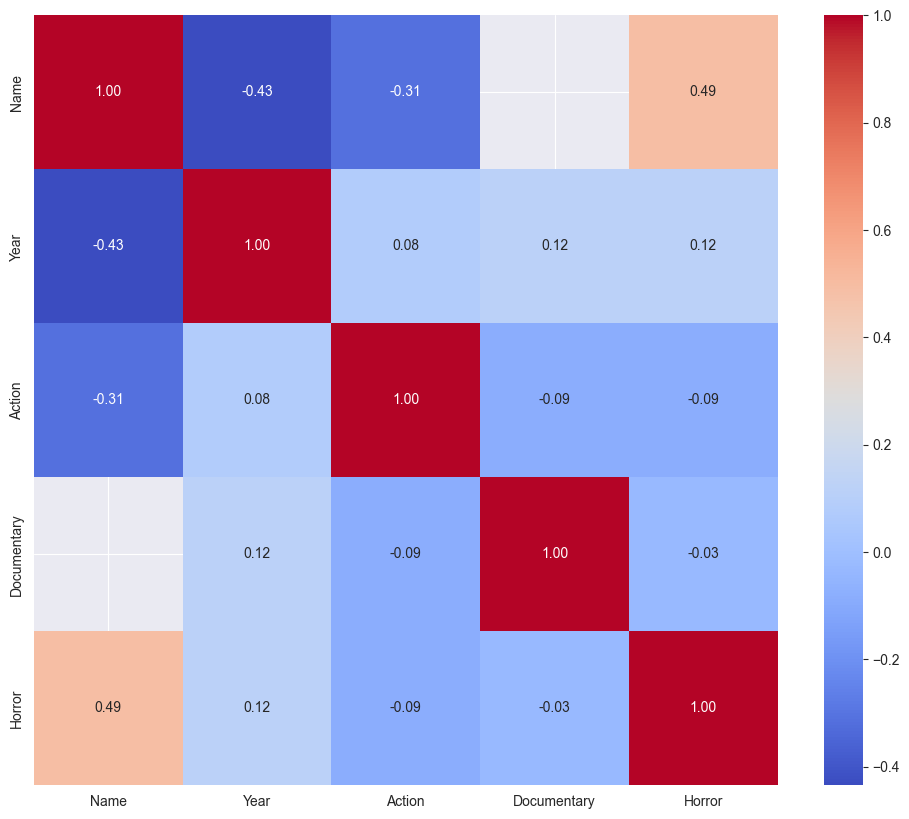

In [35]:
# Calculate the absolute correlation with the target
correlation_with_target = df.corr()['Rating'].abs()

# Select features with a correlation above the threshold (e.g., 0.5) but exclude the target column itself
important_features = correlation_with_target[correlation_with_target > 0.1].index.drop('Rating')

# Create a filtered correlation matrix with only the important features
filtered_corr_matrix = df[important_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [36]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,636,662,800,814,828,855,901,933,991,Rating_Votes
0,NaN,0.715596,0.099337,0.081662,-0.442024,1926,2250,800,3108,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,NaN,0.972477,-0.661580,1.091080,-0.581058,1548,3280,4790,527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.633981
2,NaN,0.990826,-1.318736,0.081662,-0.442024,5123,3713,2866,3450,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,NaN,0.972477,-0.626993,-1.533406,-0.442024,3319,2917,1504,4020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677802
4,NaN,0.889908,-0.799929,0.081662,-0.442024,385,3112,3462,405,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Action',
       ...
       '636', '662', '800', '814', '828', '855', '901', '933', '991',
       'Rating_Votes'],
      dtype='object', length=134)


### Model Traning After Feature Engineering 

In [39]:


# Create 'Cast' feature
df['Cast'] = df['Director'].astype(str) + ' ' + df['Actor 1'].astype(str) + ' ' + df['Actor 2'].astype(str) + ' ' + df['Actor 3'].astype(str)

# Create 'Rating_Votes' feature
df['Rating_Votes'] = df['Rating'] * df['Votes'].fillna(0)

# Filter numeric columns only (since correlation only works with numeric data)
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the absolute correlation with the target variable
correlation_with_target = numeric_df.corr()['Rating'].abs()

# Select features with a correlation above the threshold (e.g., 0.1) but exclude the target column itself
important_original_features = correlation_with_target[correlation_with_target > 0.1].index.drop('Rating')

# Include engineered features like 'Rating_Votes'
engineered_features = ['Rating_Votes']

# Combine important original features and engineered features
final_features = list(important_original_features) + engineered_features

# Optional: Encode 'Cast' using One-Hot Encoding or similar
cast_encoded = pd.get_dummies(df['Cast'], prefix='Cast')

# Append the encoded 'Cast' to the final feature set
X = pd.concat([df[final_features], cast_encoded], axis=1)
y = df['Rating']

# Proceed with the train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Implement model

In [40]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [41]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5071683635944446
R-squared: 0.4908536553843327
